# START

In [25]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# PROJECT STEPS

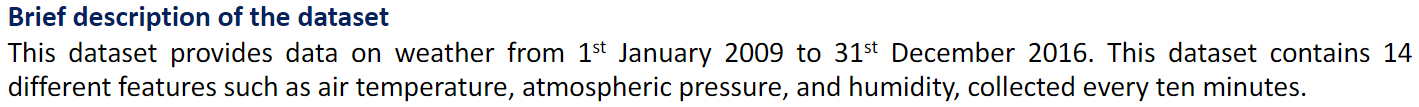

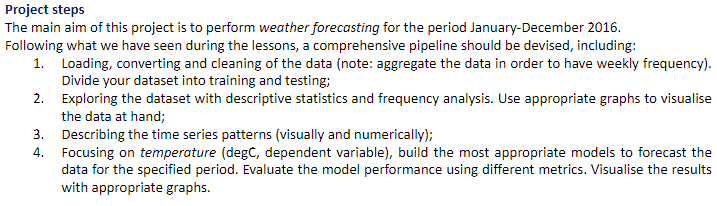

# LOADING CONVERTING AND CLEANING OF THE DATA

## load

In [3]:
Weather_data = pd.read_csv('Weather_ts.csv', sep=',', parse_dates=['Date Time'], date_format={'Date Time': '%d.%m.%Y %H:%M:%S'}, index_col='Date Time')
#with only the parser the data will not be datatime
#to resolve this problem i use the date_format
display(Weather_data.head(10))

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


Variables 

-   1	Date Time		Date-time reference (INDEX)
-   2	p (mbar)		Pressure used to quantify internal pressure (in millibars) 
-   3	T (degC)		Temperature in Celsius
-   4	Tpot (K)	             Temperature in Kelvin
-   5	Tdew (degC)		Temperature in Celsius relative to humidity 
-   6	rh (%)		             Relative Humidity 
-   7	VPmax (mbar)	Saturation vapor pressure
-   8	VPact (mbar)		Vapor pressure
-   9	VPdef (mbar)		Vapor pressure deficit
-   10	sh (g/kg)		Specific humidity
-   11	H2OC (mmol/mol)	Water vapor concentration
-   12	rho (g/m**3)	             Airtight 
-   13	wv (m/s)		Wind speed
-   14	max. wv (m/s)	Maximum wind speed
-   15	wd (deg)		Wind direction in degrees


## clean

In [4]:
#info
Weather_data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420550 entries, 2009-01-01 00:10:00 to 2016-12-31 23:50:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420550 non-null  float64
 1   T (degC)         420550 non-null  float64
 2   Tpot (K)         420550 non-null  float64
 3   Tdew (degC)      420550 non-null  float64
 4   rh (%)           420550 non-null  float64
 5   VPmax (mbar)     420550 non-null  float64
 6   VPact (mbar)     420550 non-null  float64
 7   VPdef (mbar)     420550 non-null  float64
 8   sh (g/kg)        420550 non-null  float64
 9   H2OC (mmol/mol)  420550 non-null  float64
 10  rho (g/m**3)     420550 non-null  float64
 11  wv (m/s)         420550 non-null  float64
 12  max. wv (m/s)    420550 non-null  float64
 13  wd (deg)         420550 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [5]:
#second test null value
Weather_data.isna().sum() #no null values

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [6]:
#columns
Weather_data.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

## convert

we wnat to have weekly frequency

In [7]:
Weather_data.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2016-12-31 22:20:00', '2016-12-31 22:30:00',
               '2016-12-31 22:40:00', '2016-12-31 22:50:00',
               '2016-12-31 23:00:00', '2016-12-31 23:10:00',
               '2016-12-31 23:20:00', '2016-12-31 23:30:00',
               '2016-12-31 23:40:00', '2016-12-31 23:50:00'],
              dtype='datetime64[ns]', name='Date Time', length=420550, freq=None)

In [8]:
Weather_data.index.year.unique()

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int32', name='Date Time')

In [9]:
Weather_data.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date Time')

In [10]:
Weather_data.index.day.unique()

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='Date Time')

In [11]:
Weather_data.index.minute.unique()

Index([10, 20, 30, 40, 50, 0], dtype='int32', name='Date Time')

In [12]:
Weather_data.index.second.unique()

Index([0], dtype='int32', name='Date Time')

In [13]:
#convert the data time in weekly frequency
Weather_data_wk = Weather_data.resample('W').mean()
display(Weather_data_wk)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-04,996.446696,-4.292070,269.146087,-6.185148,87.255409,4.511496,3.918348,0.593009,2.451287,3.934887,1289.293165,1.293252,2.310504,177.589652
2009-01-11,999.146161,-11.057847,262.168393,-13.171438,84.714841,2.831081,2.369058,0.462044,1.477421,2.372718,1327.335734,1.312153,2.256984,158.967391
2009-01-18,991.308760,-1.717867,272.126657,-4.664692,81.310595,5.561796,4.483313,1.078720,2.820536,4.526012,1270.352133,1.879524,2.970417,178.882599
2009-01-25,970.486319,1.151438,276.681220,-1.678264,82.035218,6.752004,5.444335,1.307619,3.499306,5.613720,1230.040417,2.553998,3.973105,188.601022
2009-02-01,990.295337,-2.464573,271.454127,-3.848323,90.406944,5.104276,4.617619,0.486429,2.905952,4.663750,1272.179296,1.981885,3.170645,46.615129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04,999.956121,-0.467679,272.701944,-3.387222,81.552579,6.156409,4.900109,1.256071,3.058046,4.906677,1275.453720,1.437123,2.741706,190.730853
2016-12-11,1000.134891,1.667212,274.823413,-1.334246,81.225665,7.381587,5.828373,1.553492,3.637927,5.834554,1265.589107,1.437609,2.601359,182.925089
2016-12-18,1002.300288,2.645923,275.628373,1.012192,89.163800,7.507450,6.704841,0.802490,4.174643,6.694365,1262.940823,1.418085,2.399752,185.361032


# EXPLORING THE DATASET

## Descriptive Statistic

In [14]:
display(Weather_data_wk)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-04,996.446696,-4.292070,269.146087,-6.185148,87.255409,4.511496,3.918348,0.593009,2.451287,3.934887,1289.293165,1.293252,2.310504,177.589652
2009-01-11,999.146161,-11.057847,262.168393,-13.171438,84.714841,2.831081,2.369058,0.462044,1.477421,2.372718,1327.335734,1.312153,2.256984,158.967391
2009-01-18,991.308760,-1.717867,272.126657,-4.664692,81.310595,5.561796,4.483313,1.078720,2.820536,4.526012,1270.352133,1.879524,2.970417,178.882599
2009-01-25,970.486319,1.151438,276.681220,-1.678264,82.035218,6.752004,5.444335,1.307619,3.499306,5.613720,1230.040417,2.553998,3.973105,188.601022
2009-02-01,990.295337,-2.464573,271.454127,-3.848323,90.406944,5.104276,4.617619,0.486429,2.905952,4.663750,1272.179296,1.981885,3.170645,46.615129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04,999.956121,-0.467679,272.701944,-3.387222,81.552579,6.156409,4.900109,1.256071,3.058046,4.906677,1275.453720,1.437123,2.741706,190.730853
2016-12-11,1000.134891,1.667212,274.823413,-1.334246,81.225665,7.381587,5.828373,1.553492,3.637927,5.834554,1265.589107,1.437609,2.601359,182.925089
2016-12-18,1002.300288,2.645923,275.628373,1.012192,89.163800,7.507450,6.704841,0.802490,4.174643,6.694365,1262.940823,1.418085,2.399752,185.361032


### Plot

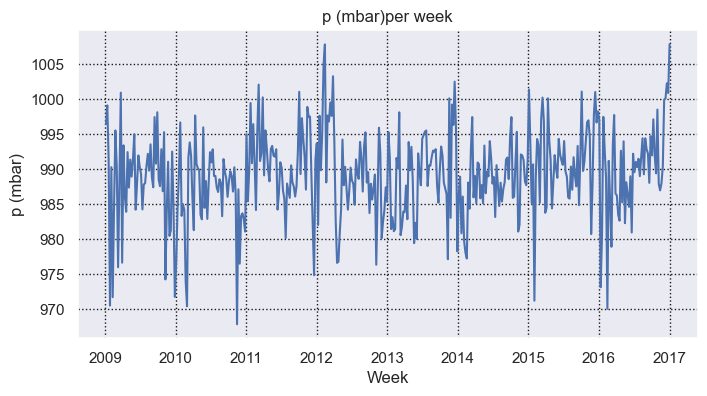

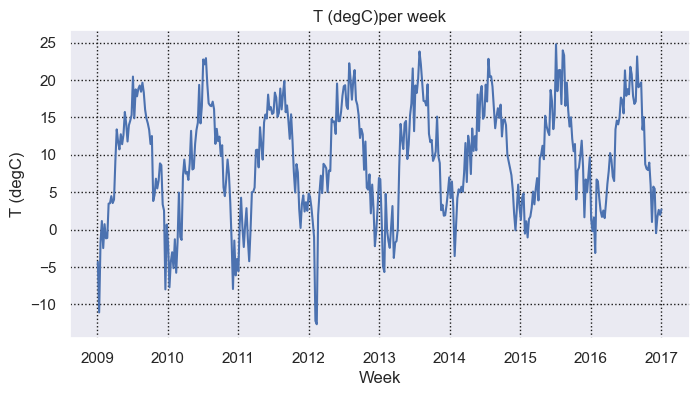

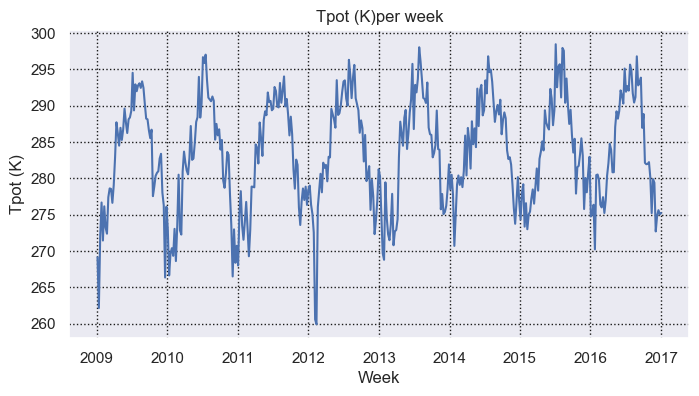

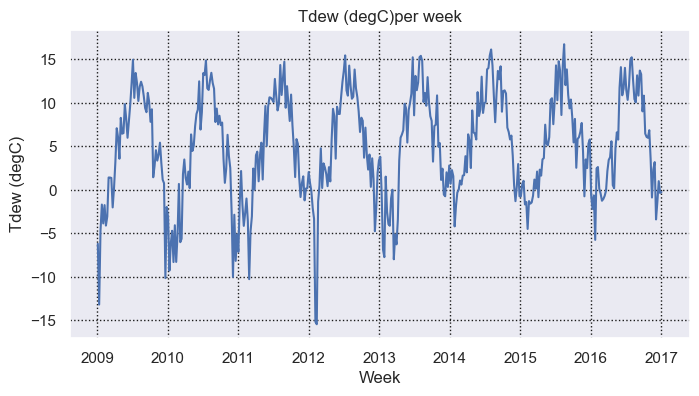

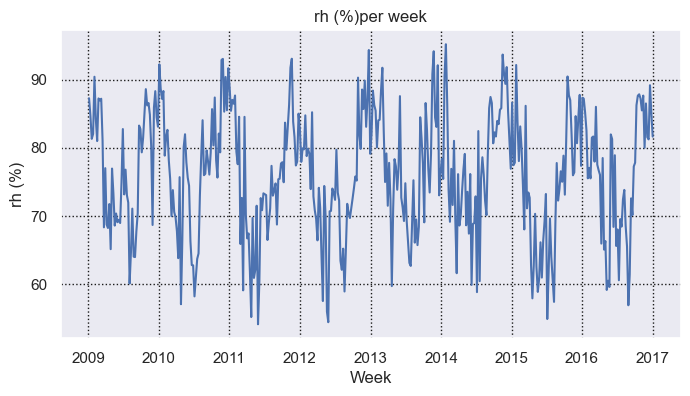

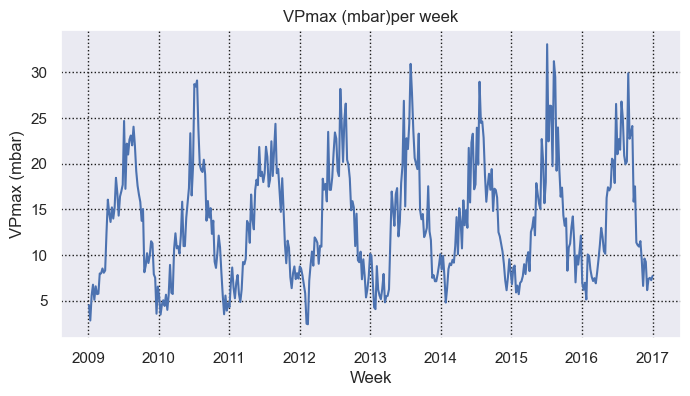

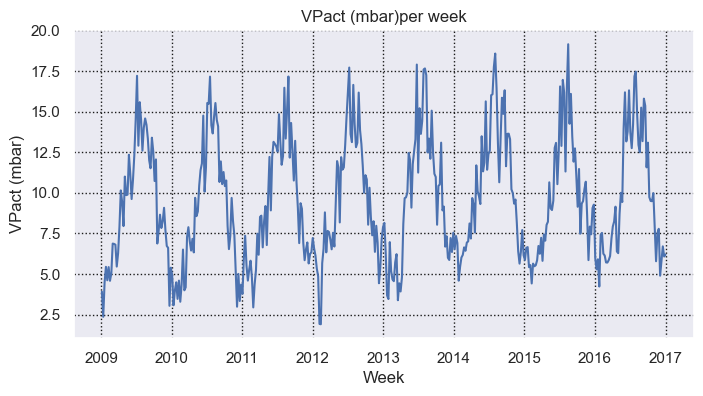

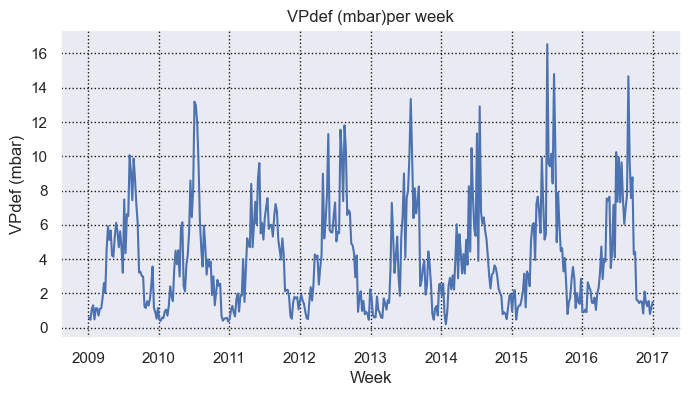

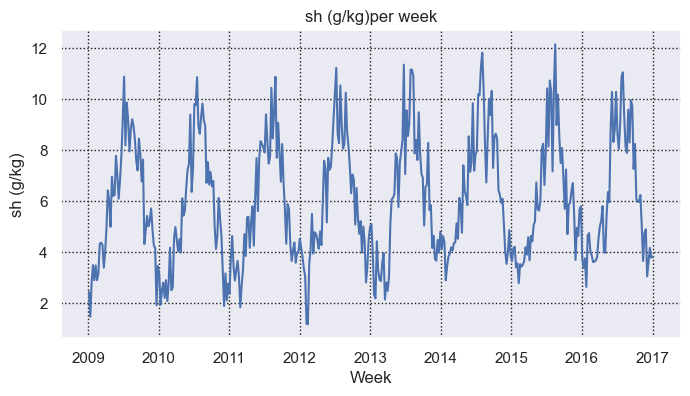

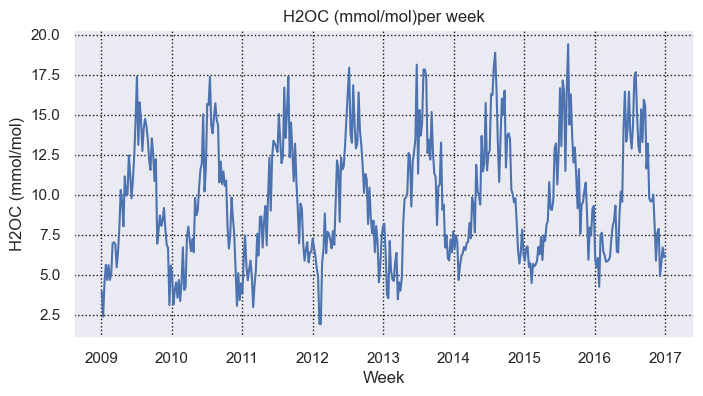

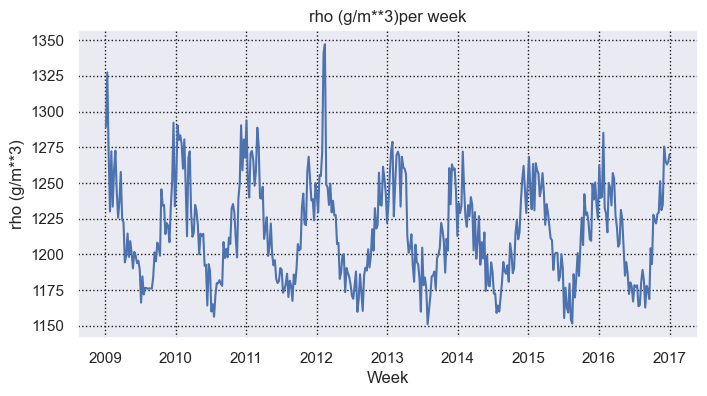

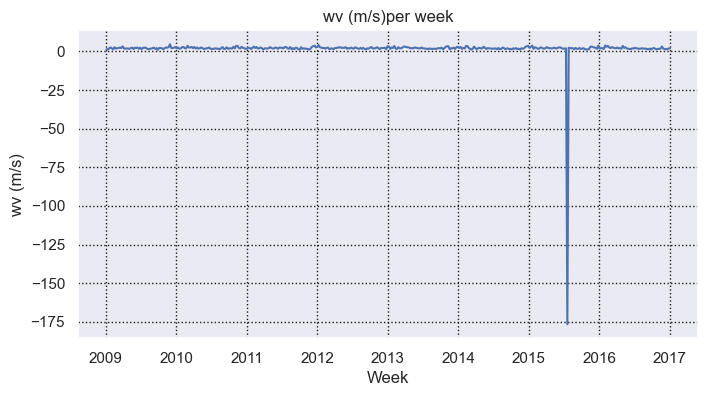

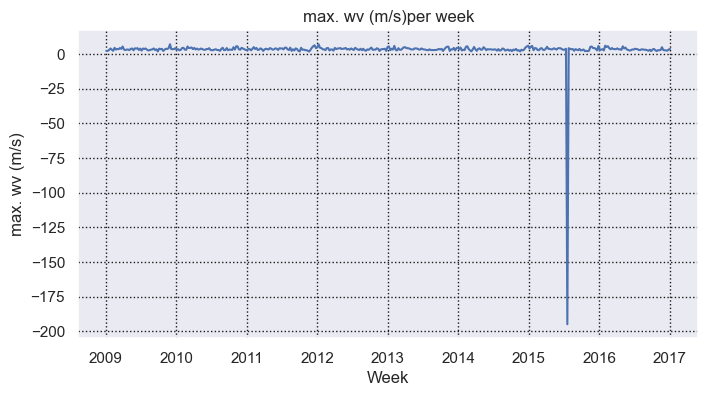

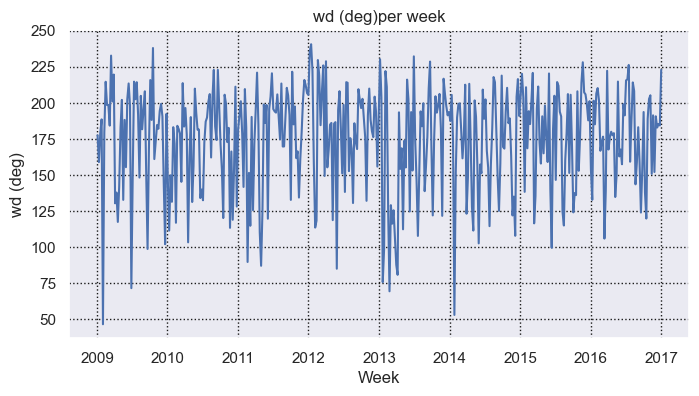

In [18]:
# plot all the data
for column in Weather_data_wk.columns:
    plt.figure(figsize=(8,4))
    plt.plot(Weather_data_wk[column])
    plt.grid(True, color = 'k', linestyle = ':')
    plt.title(column + ' per week')
    plt.xlabel('Week')
    plt.ylabel(column)

probabile outliers in max????? controllare

### Heatmap

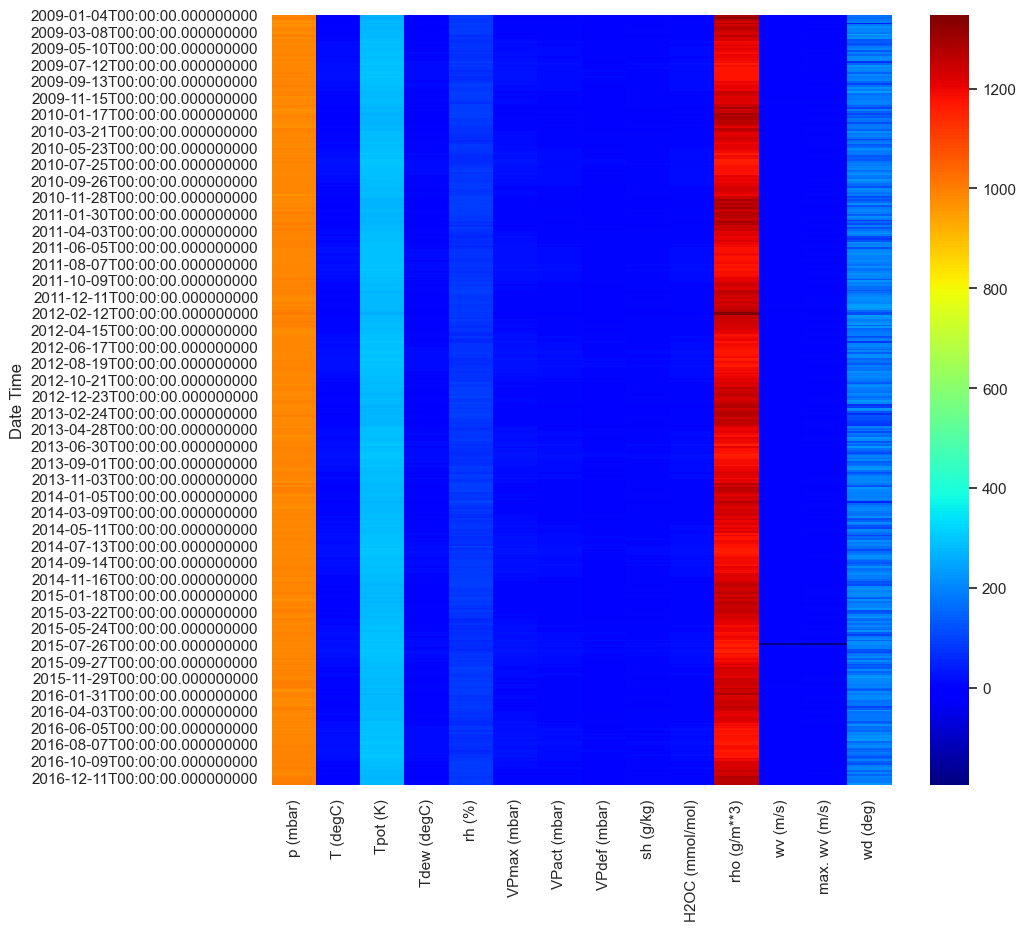

In [24]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Weather_data_wk, cmap='jet')
plt.show()

### Boxplot

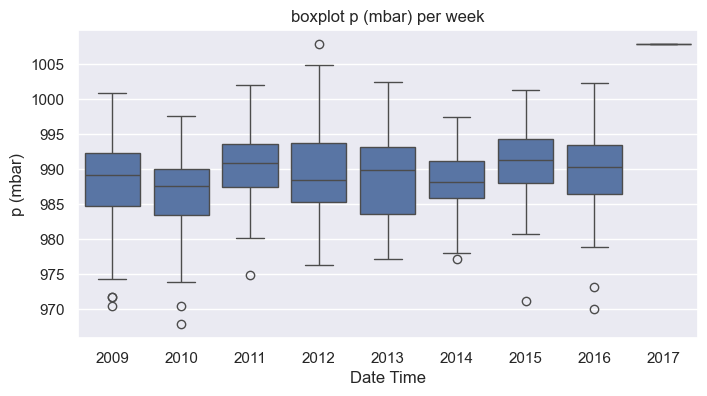

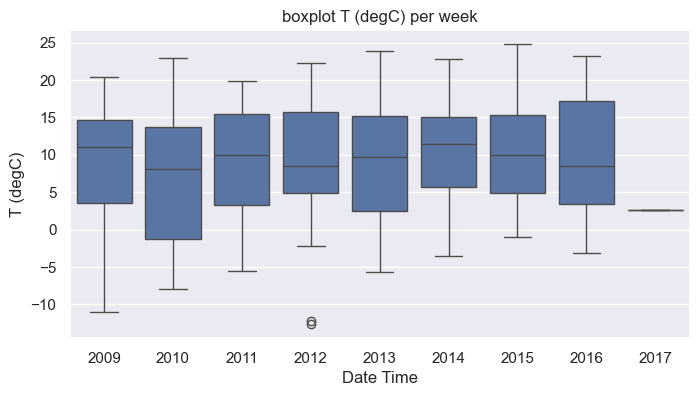

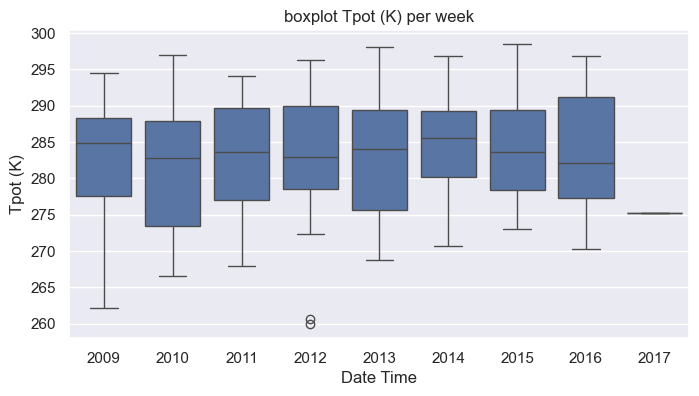

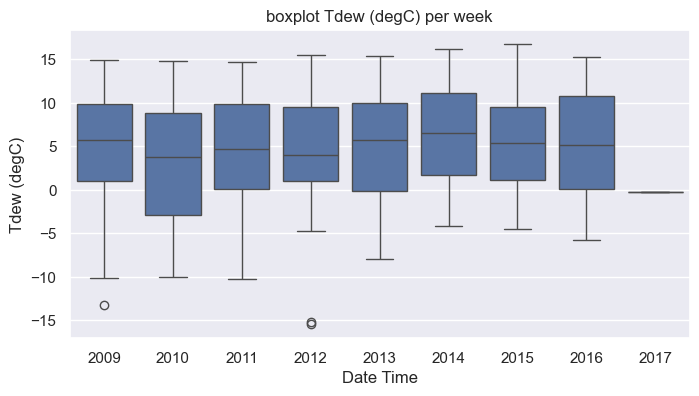

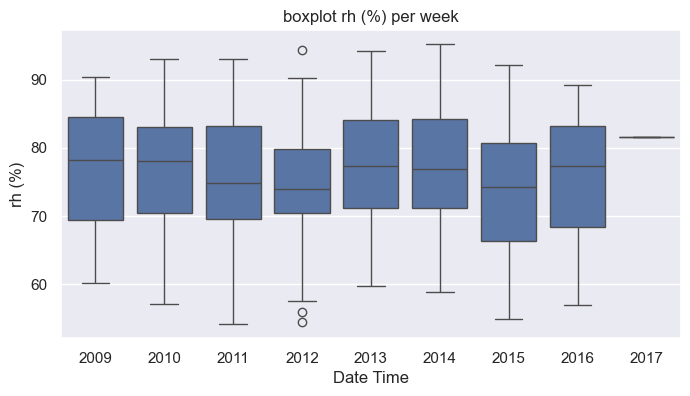

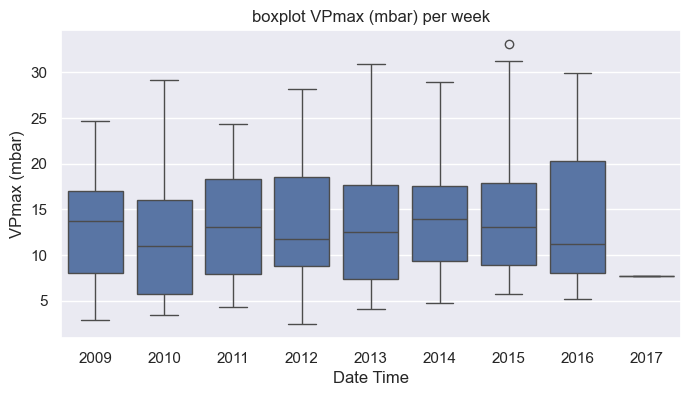

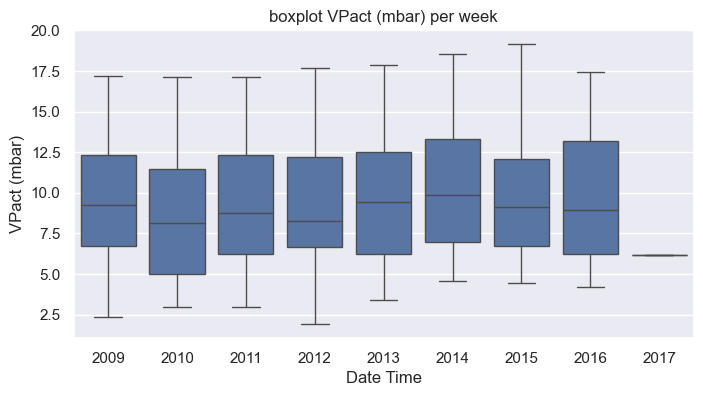

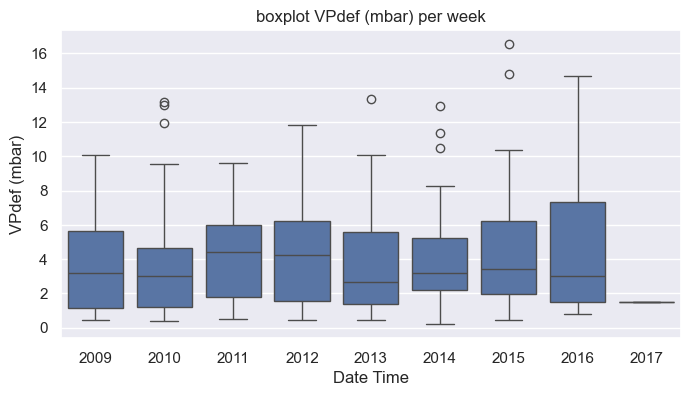

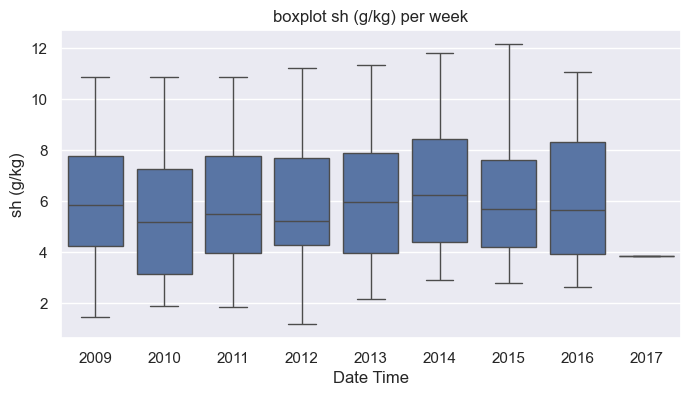

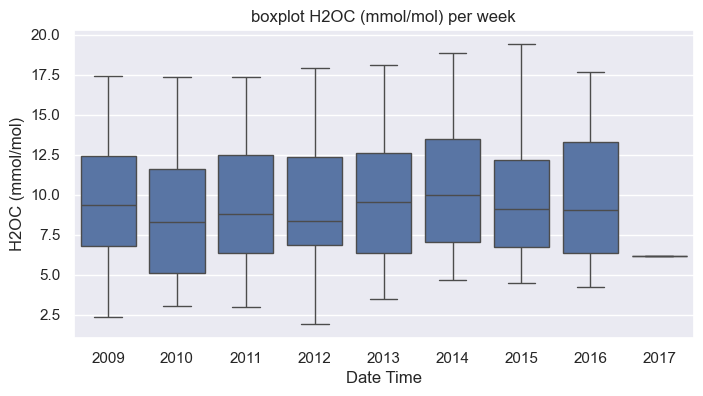

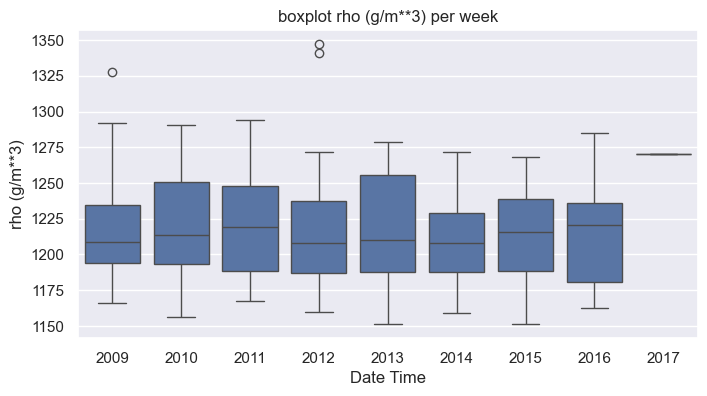

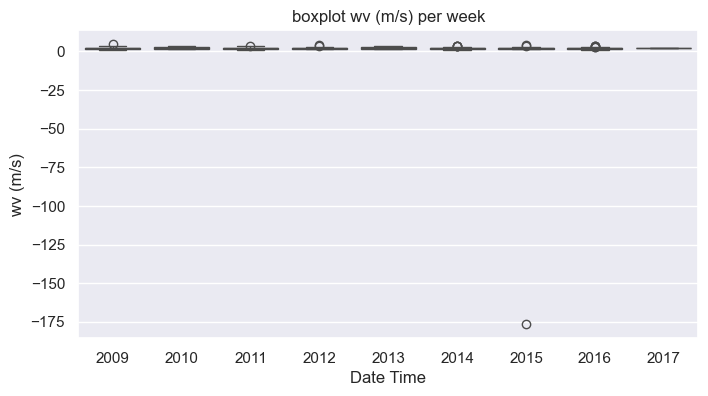

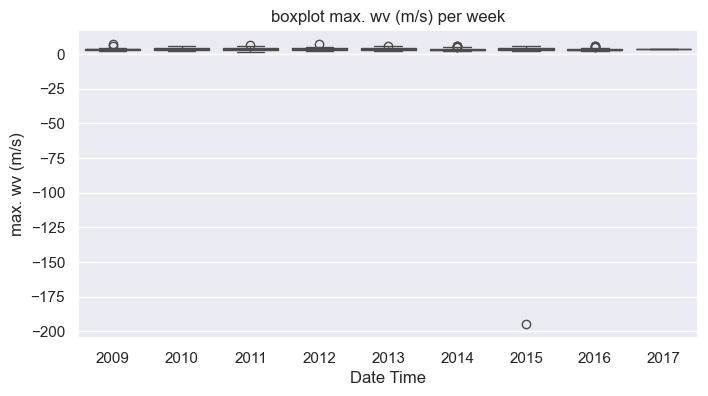

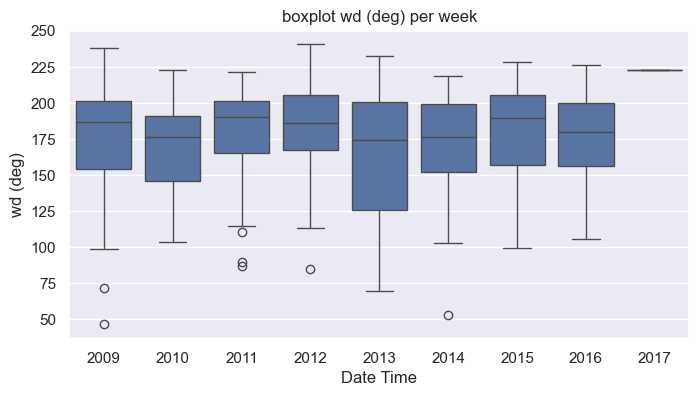

In [23]:
#Boxplot
# plot all the data
for column in Weather_data_wk.columns:
    plt.figure(figsize=(8,4))
    #plt.plot(Weather_data_wk[column])
    #plt.grid(True, color = 'k', linestyle = ':')
    plt.title('boxplot ' + column + ' per week')
    #plt.xlabel('Week')
    #plt.ylabel(column)
    sns.boxplot(x = Weather_data_wk.index.year, y = Weather_data_wk[column])
    plt.show()

outliers in wv

### Outliers

i decide to use the standard deviation method

In [28]:
for column in Weather_data_wk.columns:
    print('---------------------------')
    print(f'Outlier with standard deviation method for {column}')
    mean_value = np.mean(Weather_data_wk[column]) #calcolo la media
    sd_value = np.std(Weather_data_wk[column]) #calcolo lo sd
    thr = 3*sd_value 
    Lower = mean_value - thr
    Upper = mean_value + thr

    outliers = [i for i in Weather_data_wk[column] if i < Lower or i > Upper] #prendo tutti i valori fuori dal limite -> outlier
    print('Number of outliers:', len(outliers))
    print('Outliers:', outliers)

    P_no_outliers = [i for i in Weather_data_wk[column] if i > Lower and i < Upper]
    print('Number of non-outliers:', len(P_no_outliers))

---------------------------
Outlier with standard deviation method for p (mbar)
Number of outliers: 5
Outliers: [970.4863194444445, 970.3948611111111, 967.8167956349206, 970.0243253968254, 1007.8895486111111]
Number of non-outliers: 413
---------------------------
Outlier with standard deviation method for T (degC)
Number of outliers: 0
Outliers: []
Number of non-outliers: 418
---------------------------
Outlier with standard deviation method for Tpot (K)
Number of outliers: 2
Outliers: [260.60050595238096, 259.93815476190474]
Number of non-outliers: 416
---------------------------
Outlier with standard deviation method for Tdew (degC)
Number of outliers: 2
Outliers: [-15.153799603174603, -15.437232142857143]
Number of non-outliers: 416
---------------------------
Outlier with standard deviation method for rh (%)
Number of outliers: 0
Outliers: []
Number of non-outliers: 418
---------------------------
Outlier with standard deviation method for VPmax (mbar)
Number of outliers: 1
Outlie

come possiamo vedere in wm e max wm abbiamo trovato gli outlier maggiori 

Per quanto rigurda la temperatura in C non abbiamo trovato outliers

### Autocorrelation

<Figure size 800x400 with 0 Axes>

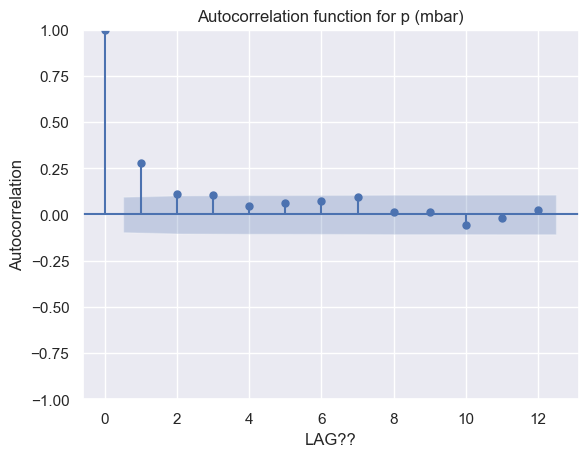

<Figure size 800x400 with 0 Axes>

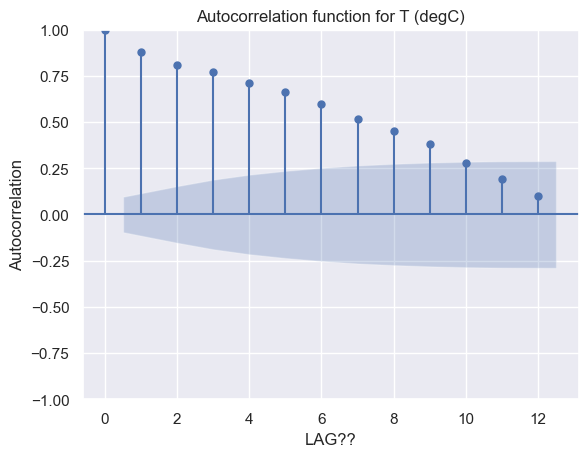

<Figure size 800x400 with 0 Axes>

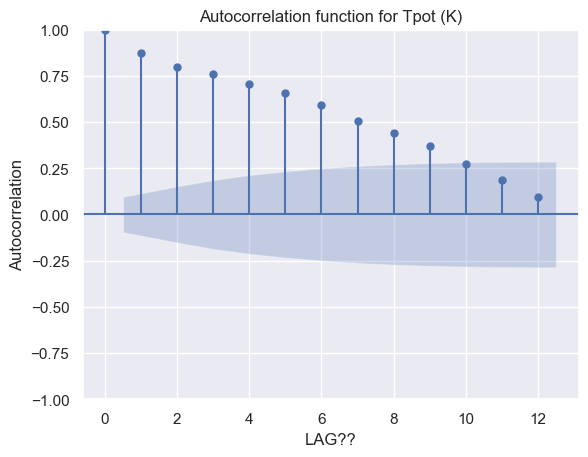

<Figure size 800x400 with 0 Axes>

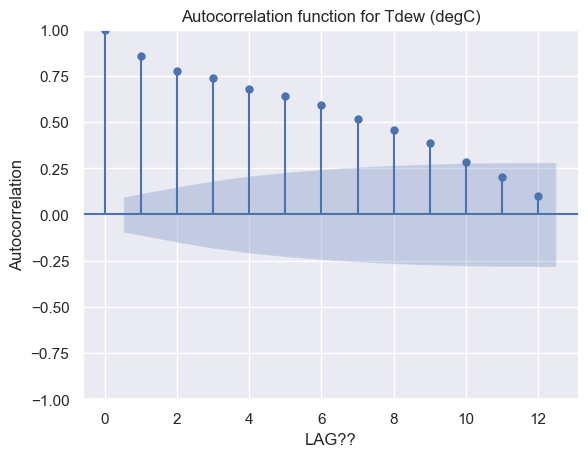

<Figure size 800x400 with 0 Axes>

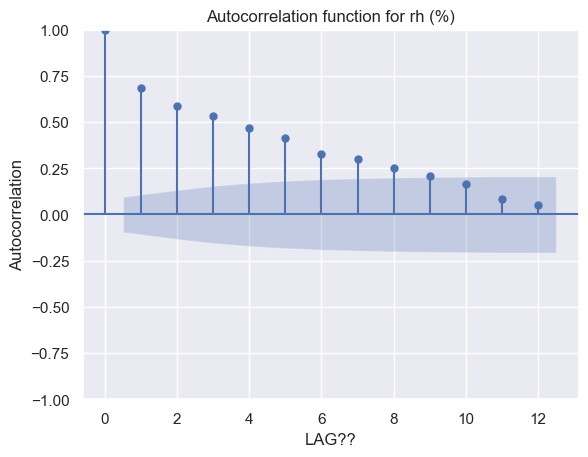

<Figure size 800x400 with 0 Axes>

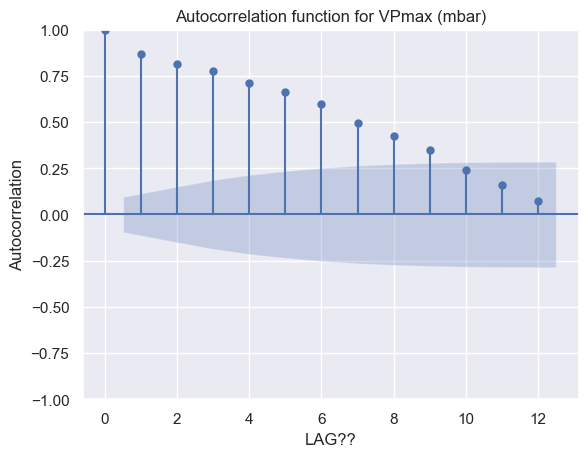

<Figure size 800x400 with 0 Axes>

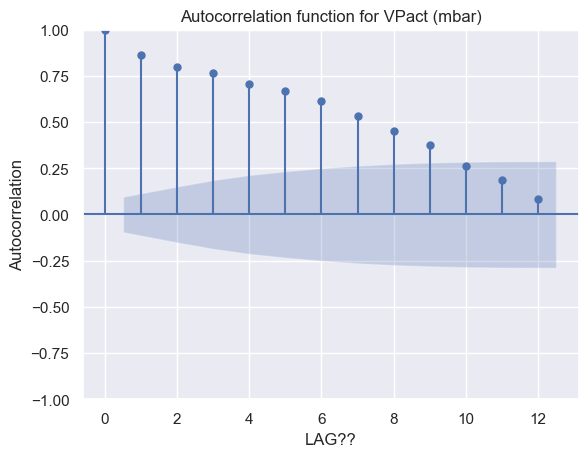

<Figure size 800x400 with 0 Axes>

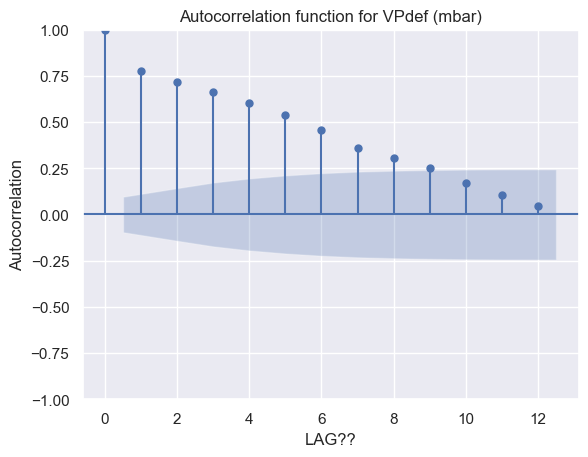

<Figure size 800x400 with 0 Axes>

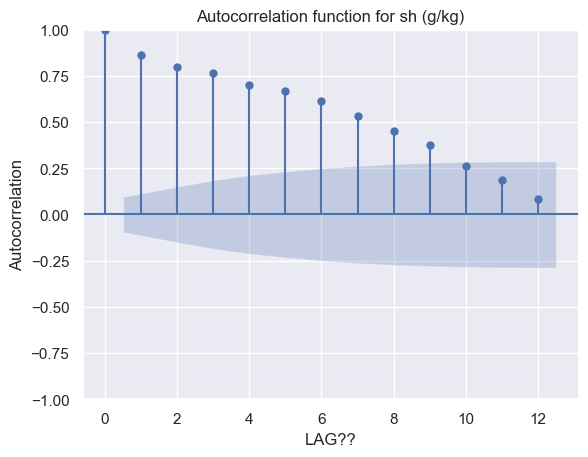

<Figure size 800x400 with 0 Axes>

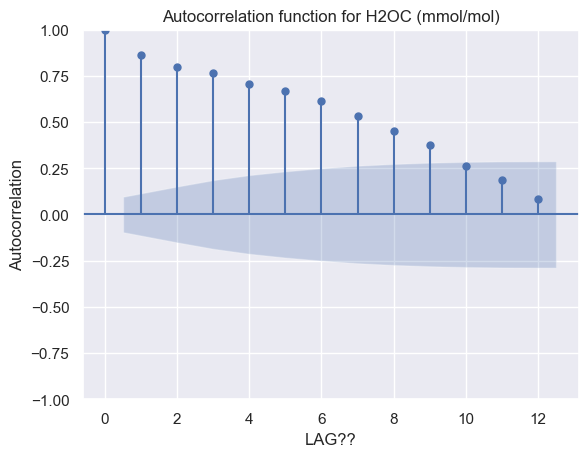

<Figure size 800x400 with 0 Axes>

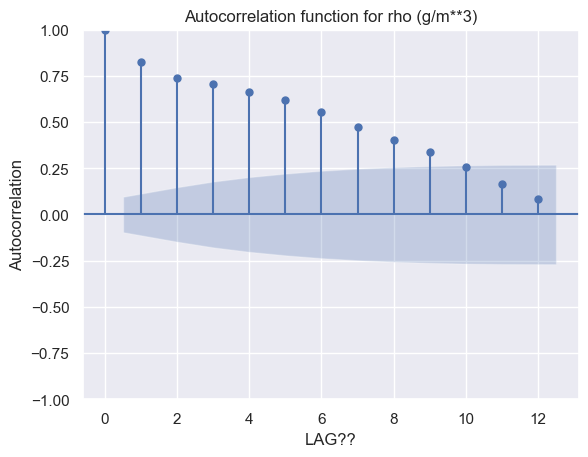

<Figure size 800x400 with 0 Axes>

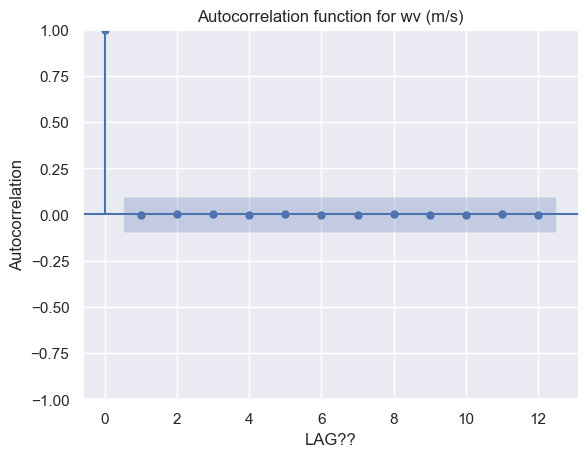

<Figure size 800x400 with 0 Axes>

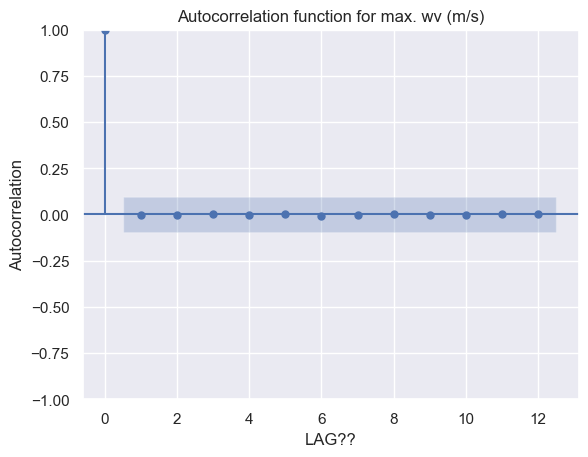

<Figure size 800x400 with 0 Axes>

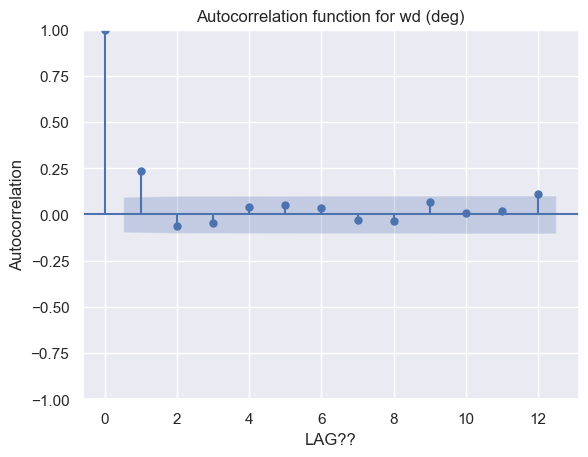

In [27]:
# plot all the data
for column in Weather_data_wk.columns:
    plt.figure(figsize=(8,4))
    plot_acf(Weather_data_wk[column], lags=12)
    plt.title('Autocorrelation function for ' + column)
    plt.xlabel('LAG??')
    plt.ylabel('Autocorrelation')
    plt.show()
    
#matplotlib.pyplot.close()

per la maggior parte abbiamo un seasonality che si ripete ogni 1 mese/ 1 lag, in più la autocorrelazione è sempre positiva (RIVEDER)

### Decomposition

## Frequency Analysis

vedere la lezione 6 fatta dalla prof

### Power Spectral Density (PSD)

### Power Spectral Density (PSD) based on Periodgram